transforms a shapefile with admnistrative boundaries to SVG conserving attributes

In [58]:
import matplotlib.pylab as plt
import geopandas as gpd
import fiona
%matplotlib inline


In [60]:
shp=gpd.read_file("PHL_adm1.shp")



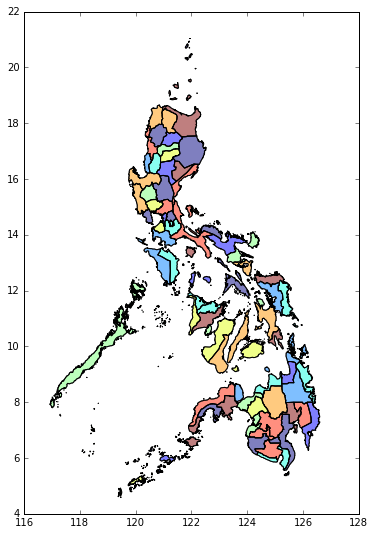

In [61]:
plt.figure(figsize=(9,9))
shp.plot()

KeyError: 'data-class'

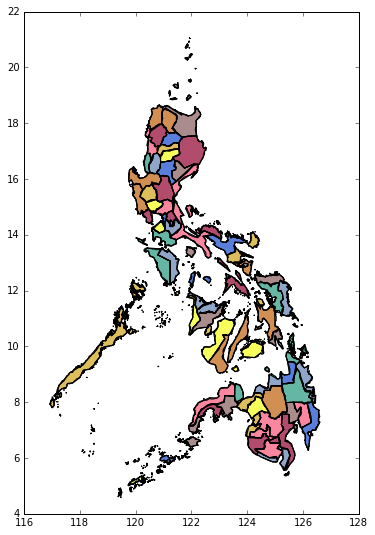

In [67]:
#Simplify
simple =shp.simplify(0.05)
plt.figure(figsize=(9,9))
shp.plot()
simple.plot()
test.to_file("PHL_adm1_simple.shp")
shp_to_svg(my_shapefile_path = "PHL_adm1_simple.shp", target_svg = 'BlankSimpleMap.svg')

KeyError: 'data-class'

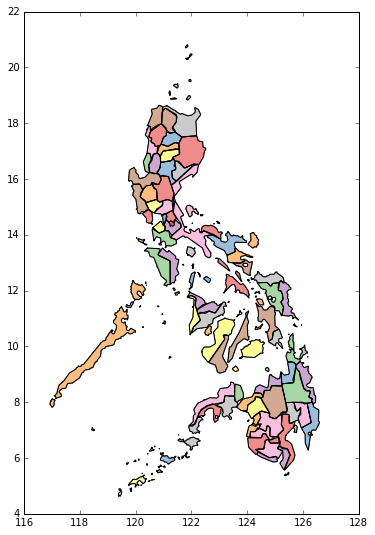

In [64]:
#remove small shapes    http://gis.stackexchange.com/questions/120286/removing-small-polygons-gaps-in-a-shapely-polygon

eps = 0.05  # epsilon that is approx. the width of slivers

test=simple.buffer(eps, 1).buffer(-eps)

plt.figure(figsize=(9,9))
test.plot()
test.to_file("PHL_adm1_simple_droped.shp")
shp_to_svg(my_shapefile_path = "PHL_adm1_simple_droped.shp", target_svg = 'BlankSimpleMapDroped.svg')

In [ ]:
#remove small shapes    http://gis.stackexchange.com/questions/120286/removing-small-polygons-gaps-in-a-shapely-polygon

eps = 0.05  # epsilon that is approx. the width of slivers

test=simple.buffer(eps, 1).buffer(-eps)

plt.figure(figsize=(9,9))
test.plot()
test.to_file("PHL_adm1_simple_droped.shp")
shp_to_svg(my_shapefile_path = "PHL_adm1_simple_droped.shp", target_svg = 'BlankSimpleMapDroped.svg')

In [49]:
#trying a method where I manually remove small-area polygons  (not finished)
min_area = shp.area.min()/10

series  = shp.ix[5]
for s in series.geometry:
    list_of_series =[]
    if (s.area) > min_area:
        

## Kartograph

In [1]:
from string import Template
from subprocess import call
import os
from bs4 import BeautifulSoup



In [7]:
os.path.splitext("phl_polbnda_adm2_gsi.shp")

('phl_polbnda_adm2_gsi', '.shp')

In [10]:
my_shapefile_path = "phl_polbnda_adm2_gsi.shp"
my_reg_id = "ProvName"
target_svg = 'BlankSimpleMap.svg'
my_svg_title = "Map of the Philippines"
k_config_model = 'kartograph_config_model.json'


#Temp file names
file, ext = os.path.splitext(target_svg)
tmp_svg_file = file+"_raw"+ext
tmp_config_file = "katograph_config_tmp.json"

#get generic Kartograph configuration
with open(k_config_model, 'r') as myfile:
    katograph_config_model=myfile.read()

#specifies K config with user paramters   
katograph_config = Template(katograph_config_model).safe_substitute(
    shapefile_path=my_shapefile_path, region_identifier=my_reg_id) #use Template to format a string that contains extra curly brackets
#writes the config file 
with open(tmp_config_file, "w") as text_file:
    text_file.write(katograph_config)

#calls Kartograph 
err= call("activate py2 & kartograph "+tmp_config_file+" -o "+tmp_svg_file, shell=True)
if err>0:
    print("error " + err)


### POST-PROCESSES THE KARTOGRAPH SVG: DATA-CLASS TO CLASS AND PRETTY INDENTATION

#opens 
with open(tmp_svg_file, 'r', encoding='utf8') as svgfile:
    thesvg = svgfile.read()

#parses the SVG (an XML file)
soup=BeautifulSoup(thesvg,"xml")

#renames all the "data-class" from Kartograph to "class" and gives them a title (for mouse hover)
for path in soup.findAll("path"):
    path["class"]=path["data-class"]
    del path["data-class"]
    p_title = soup.new_tag("title")
    p_title.string = path["class"]
    path.insert(1,p_title)

#gives a class to the big shape (wont work if there are oceans as they will get default format)    
for g in soup.findAll("g"):
    g["class"]  = g["id"]    

#Add a title to the whole SVG    
new_title =soup.new_tag("title")
new_title.string= my_svg_title
soup.svg.insert(1,new_title)

#deletes "pretty print" and enable_background attirbutes (unimportant)
del soup.svg["pretty_print"]
del soup.svg["enable_background"]

#OVERWRITES the initial SVG with the new SVG    
with open(target_svg, 'w',  encoding='utf8') as svgfile:
    svgfile.write(soup.prettify())


#deletes temp files

#Kartograph config
if os.path.exists(tmp_config_file):
    try:
        os.remove(tmp_config_file)
    except:
        pass

#Unformated SVG    
if os.path.exists(tmp_svg_file):
    try:
        os.remove(tmp_svg_file)   
    except:
        pass

In [3]:
shp_to_svg("phl_polbnda_adm2_gsi.shp")

KeyError: 'data-class'